## Data Exploration
We will start exploring the data before doing any analysis on it, we will try to see how our data is and how can we make it workable.

In [245]:
# Import required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Modeling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


In [246]:
df = pd.read_csv("bank_data.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [248]:
# Numeric columns statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [249]:
df.describe(include=['O']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,6,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


### Data manipulation
We have loaded the data into our dataframe but we see that we have so many unknowns & none values so we will try to reduce/eliminate those.

In [250]:
# Validate the missing values
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [251]:
# Fetch columns based on data types
def get_data(data, data_type):
    return [column for column in data.columns if data[column].dtype == data_type]


In [252]:
def get_category_frequency_data(df, columns):
    category_frequency = []
    print(columns)
    for column in columns:
        print(column)
        unique_categories = df[column].unique()
        for category in unique_categories:
            frequency = (df[column] == category).sum()
            category_frequency.append({'Column': column, 'Category': category, 'Frequency': frequency})
            # Create a DataFrame and sort in descending order of frequency under each column
            category_frequency_df = pd.DataFrame(category_frequency)
            category_frequency_df.sort_values(by=['Column', 'Frequency'], ascending=[True, False], inplace=True)

            # Reset index for the final DataFrame
            category_frequency_df.reset_index(drop=True, inplace=True)
    return category_frequency_df

In [253]:
qualitative_columns = get_data(df, 'object')

get_category_frequency_data(df, qualitative_columns)


['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']
checking_balance
credit_history
purpose
savings_balance
employment_duration
other_credit
housing
job
phone
default


,Column,Category,Frequency
0,checking_balance,unknown,394
1,checking_balance,< 0 DM,274
2,checking_balance,1 - 200 DM,269
3,checking_balance,> 200 DM,63
4,credit_history,good,530
5,credit_history,critical,293
6,credit_history,poor,88
7,credit_history,very good,49
8,credit_history,perfect,40
9,default,no,700


In [254]:

get_category_frequency_data(df, ['purpose'])

['purpose']
purpose


,Column,Category,Frequency
0,purpose,furniture/appliances,473
1,purpose,car,337
2,purpose,business,97
3,purpose,education,59
4,purpose,renovations,22
5,purpose,car0,12


In [255]:
# Manipulate data for the type `purpose`
df['purpose'].str.replace('car0', 'car').unique()

array(['furniture/appliances', 'education', 'car', 'business',
       'renovations'], dtype=object)

In [256]:
df['purpose'] = df['purpose'].str.replace('car0', 'car')

In [257]:
get_category_frequency_data(df, ['purpose'])

['purpose']
purpose


,Column,Category,Frequency
0,purpose,furniture/appliances,473
1,purpose,car,349
2,purpose,business,97
3,purpose,education,59
4,purpose,renovations,22


In [258]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

### Data Visualizations
We will do some data exploration via visualization to see the patterns in the data, as there are some data we can't see by naked eyes and watching numbers and categories.

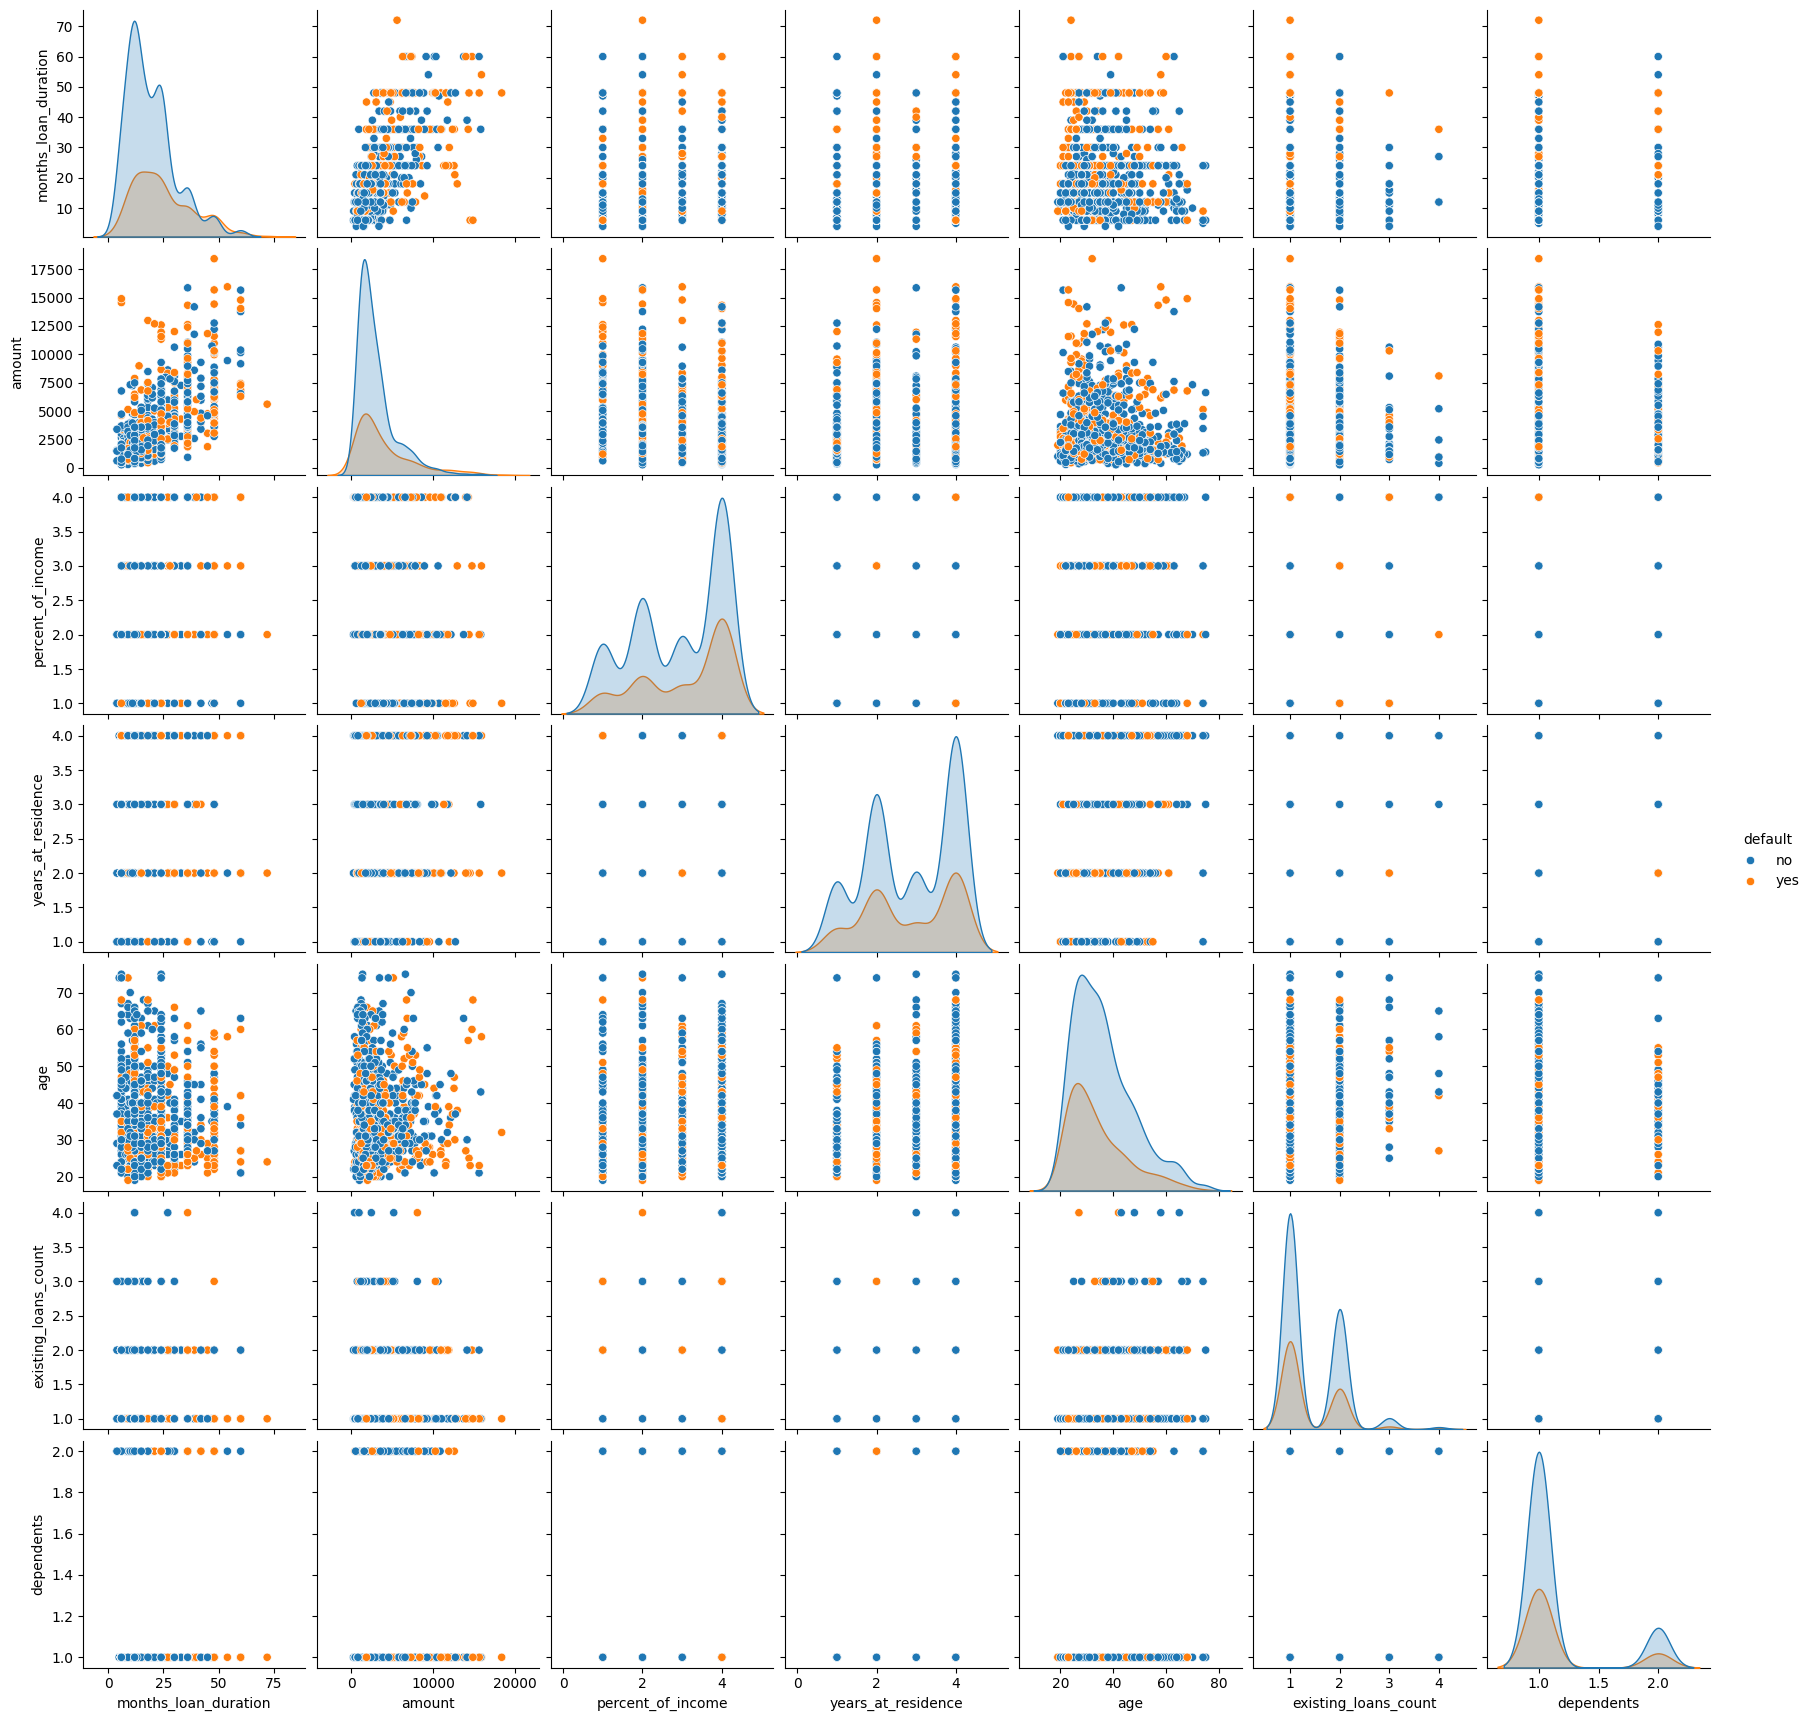

In [259]:
sns.pairplot(df, hue='default')

### Numerical columns
I don't see any linear relation as such, we can try analyzing some numerical data and then we will move analyzing the categorical data

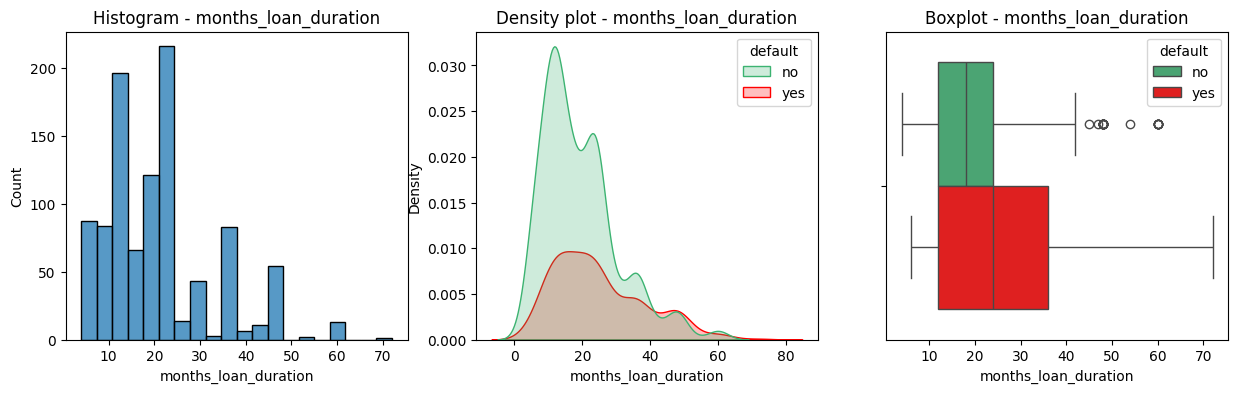

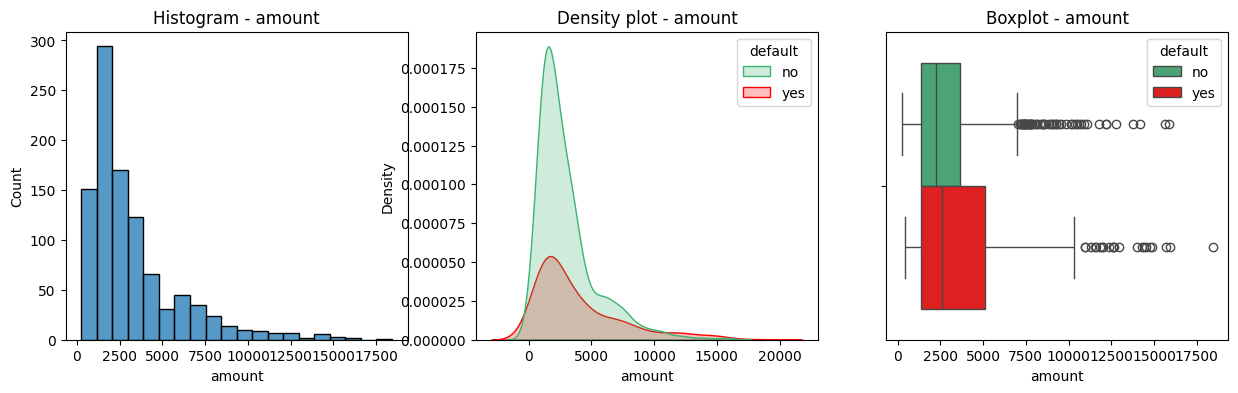

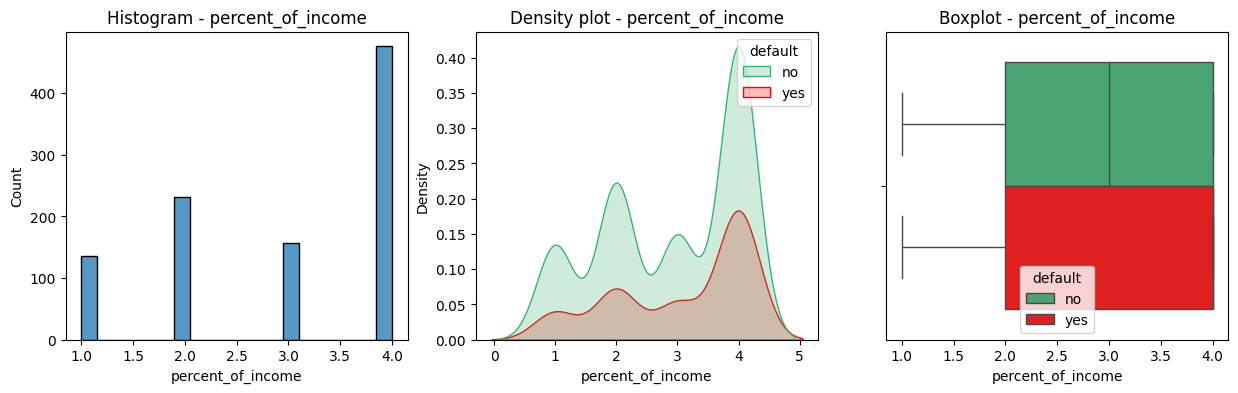

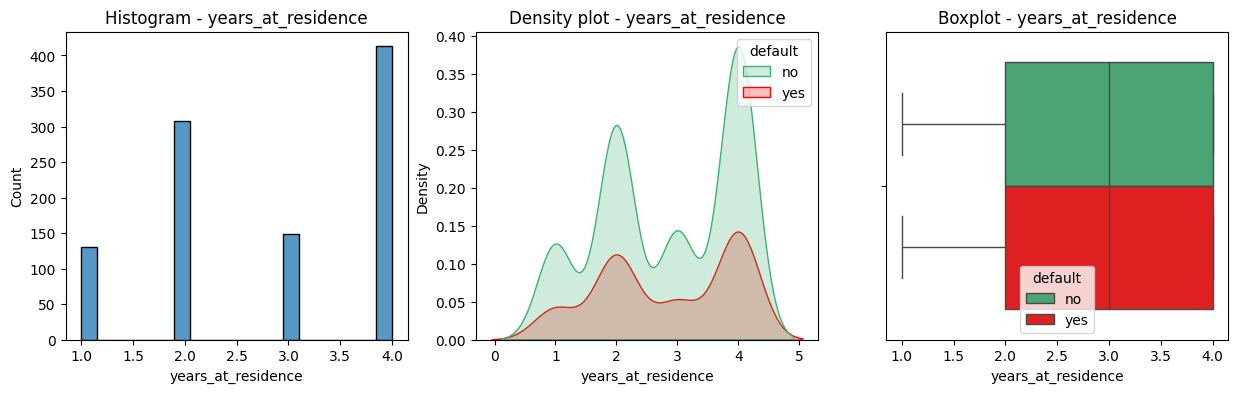

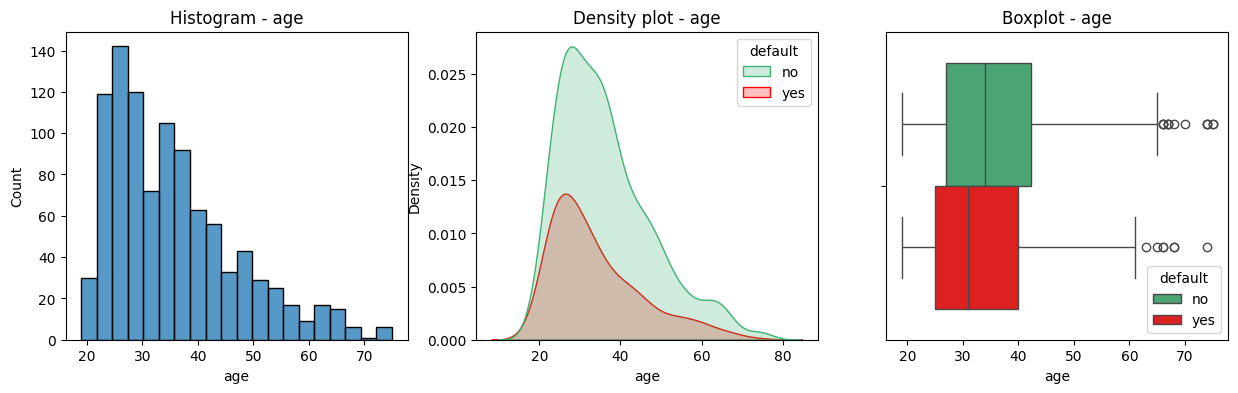

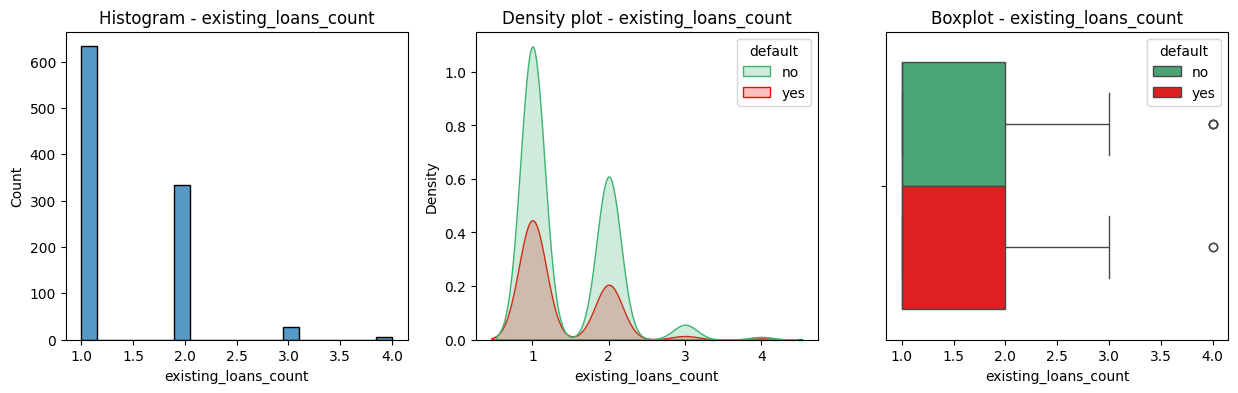

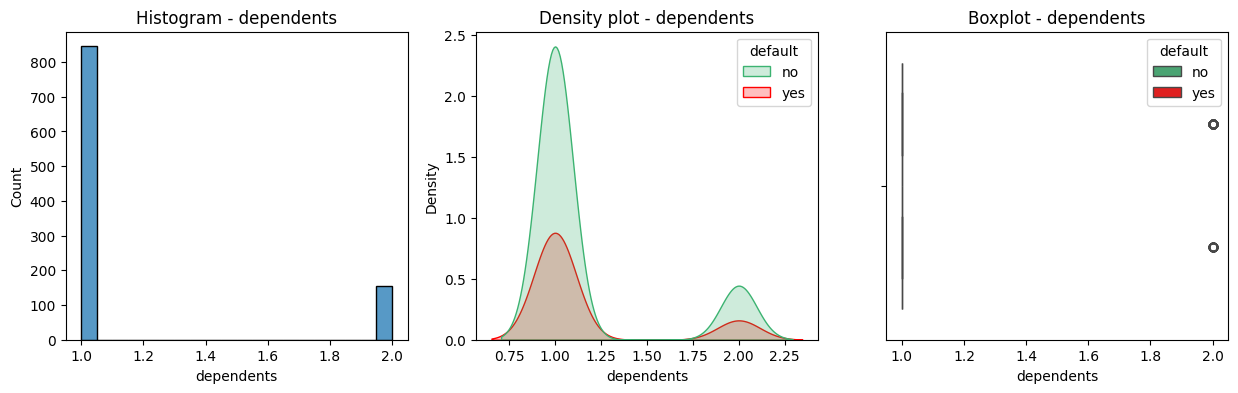

In [264]:


# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Histogram, Density plot (hue='default') & Boxplots (hue='default') for each numerical column
for numerical_variable in numerical_columns.columns:
    # Create a figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
    # Histogram without any hue='default'
    sns.histplot(data=df, x=numerical_variable, ax=ax1, bins=20, kde=False)
    ax1.set_title(f'Histogram - {numerical_variable}')
    
    # Kernel density with hue='default'
    sns.kdeplot(data=df, x=numerical_variable, hue='default', ax=ax2, fill=True,
                palette={'yes': 'red', 'no': 'mediumseagreen'})
    ax2.set_title(f'Density plot - {numerical_variable}')
    
    # Boxplot with hue='default'
    sns.boxplot(data=df, x=numerical_variable, hue='default', ax=ax3,
                palette={'yes': 'red', 'no': 'mediumseagreen'})
    ax3.set_title(f'Boxplot - {numerical_variable}')

    plt.show()

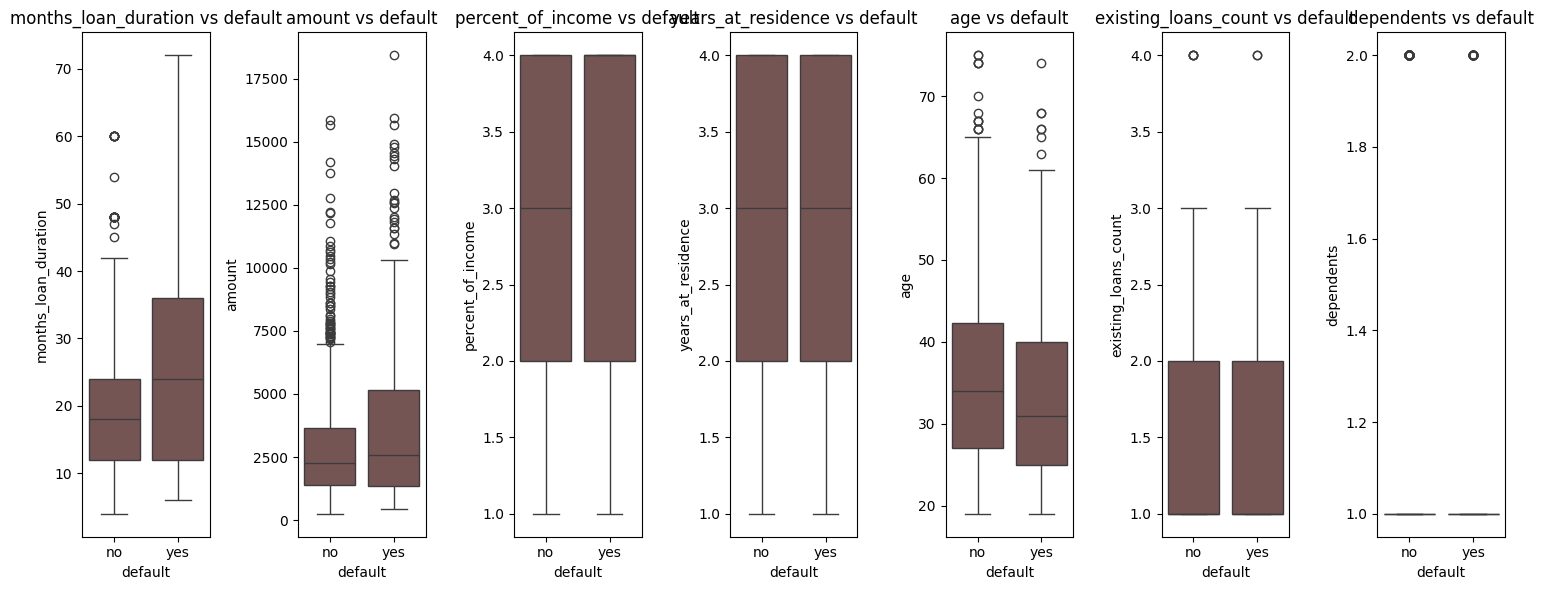

In [296]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))

# Numerical Variables
numerical_vars = numerical_columns.columns

# Set the palette to "pink"
sns.set_palette("pink")

# Plot each numerical variable with respect to 'Risk' in the grid layout
for i, var in enumerate(numerical_vars):
    sns.boxplot(x='default', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs default')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<Axes: xlabel='months_loan_duration', ylabel='amount'>

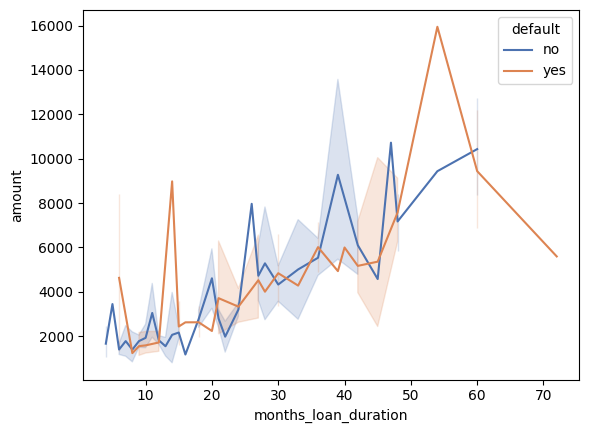

In [297]:
sns.lineplot(data=df, x='months_loan_duration', y='amount', hue='default', palette='deep')

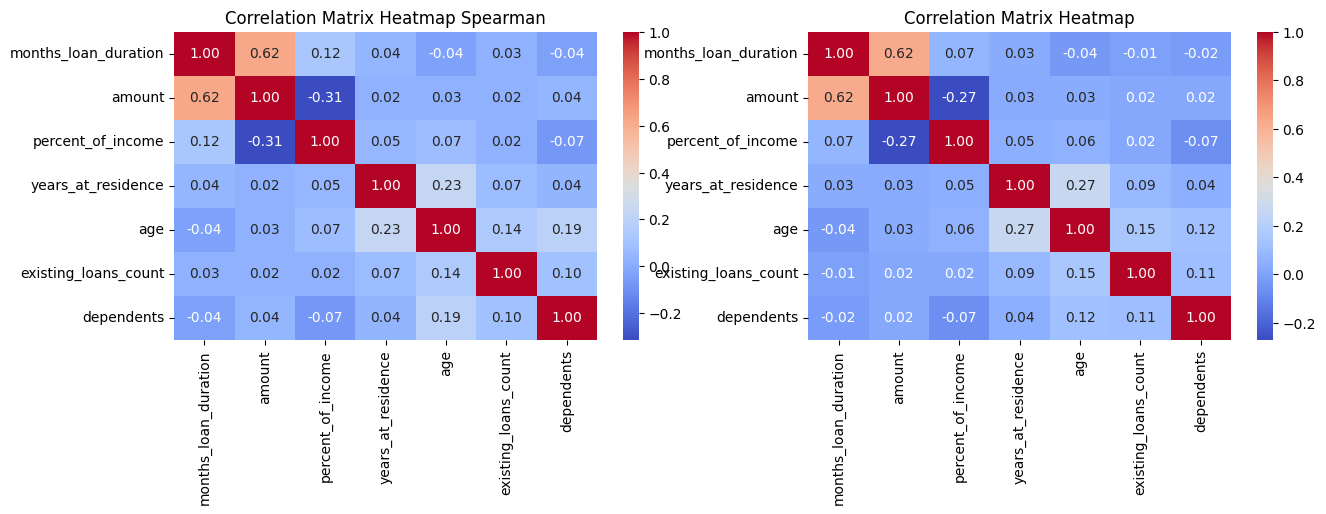

In [275]:
correlation_matrix_spearman = numerical_columns.corr(method='spearman')
correlation_matrix = numerical_columns.corr()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix_spearman, ax=ax1, annot=True, cmap='coolwarm', fmt=".2f")
ax1.set_title('Correlation Matrix Heatmap Spearman')

sns.heatmap(correlation_matrix, ax=ax2, annot=True, cmap='coolwarm', fmt=".2f")
ax2.set_title('Correlation Matrix Heatmap')
plt.show()

In [204]:
correlation_matrix_spearman

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624709,0.118046,0.043671,-0.036316,0.028430,-0.043265
amount,0.624709,1.000000,-0.313100,0.023646,0.026298,0.023778,0.041815
percent_of_income,0.118046,-0.313100,1.000000,0.047507,0.072157,0.020997,-0.072543
years_at_residence,0.043671,0.023646,0.047507,1.000000,0.234709,0.067193,0.040455
age,-0.036316,0.026298,0.072157,0.234709,1.000000,0.141287,0.190651
existing_loans_count,0.028430,0.023778,0.020997,0.067193,0.141287,1.000000,0.096978
dependents,-0.043265,0.041815,-0.072543,0.040455,0.190651,0.096978,1.000000


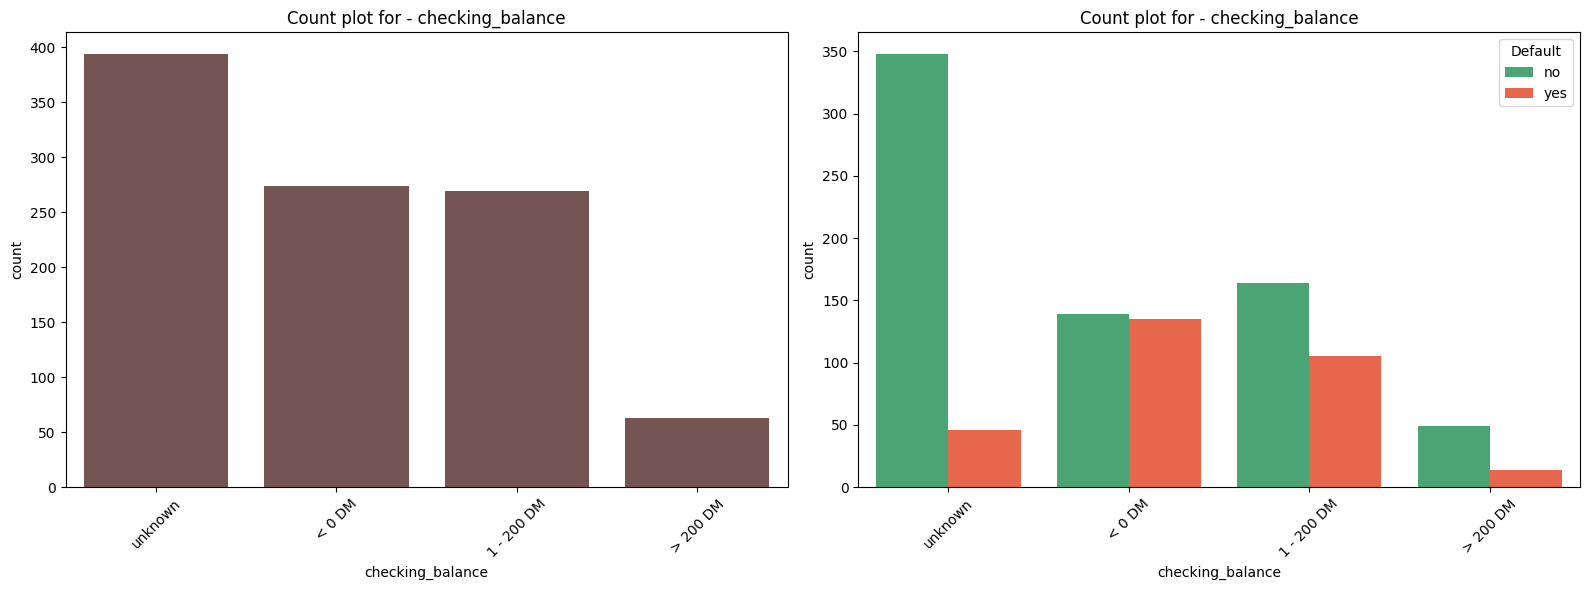

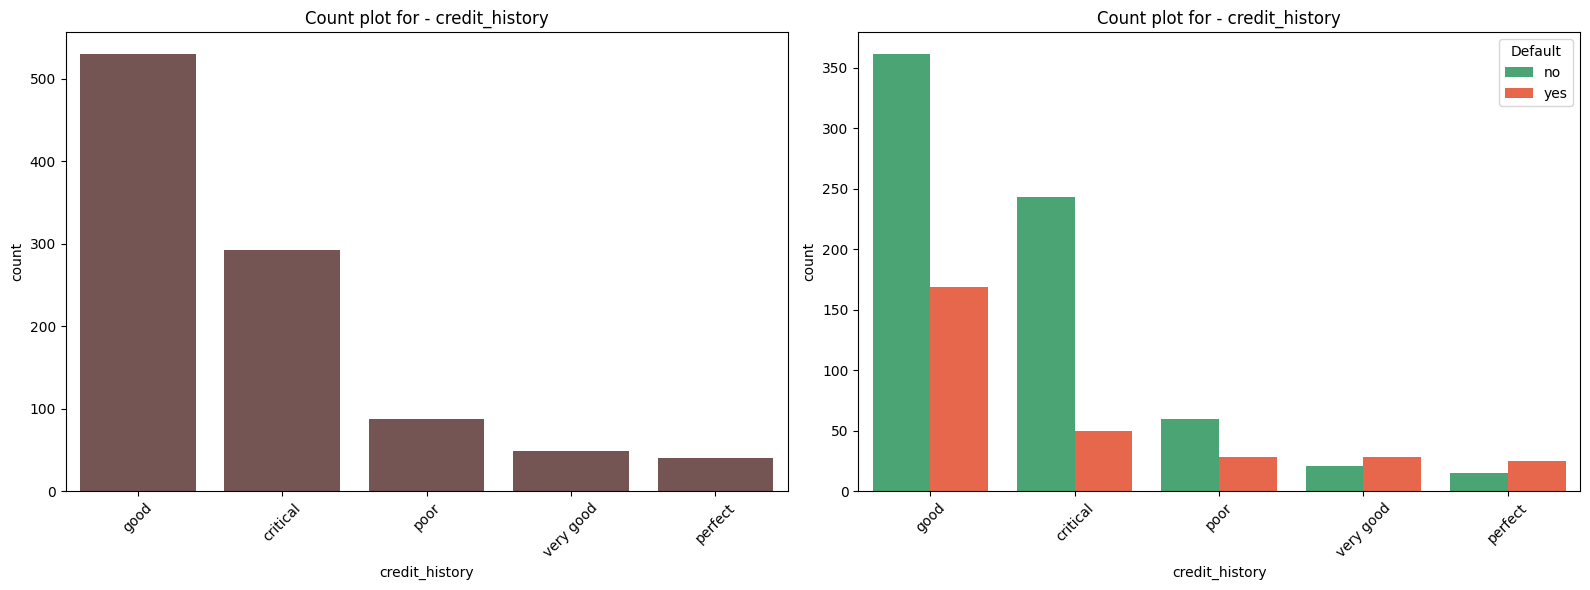

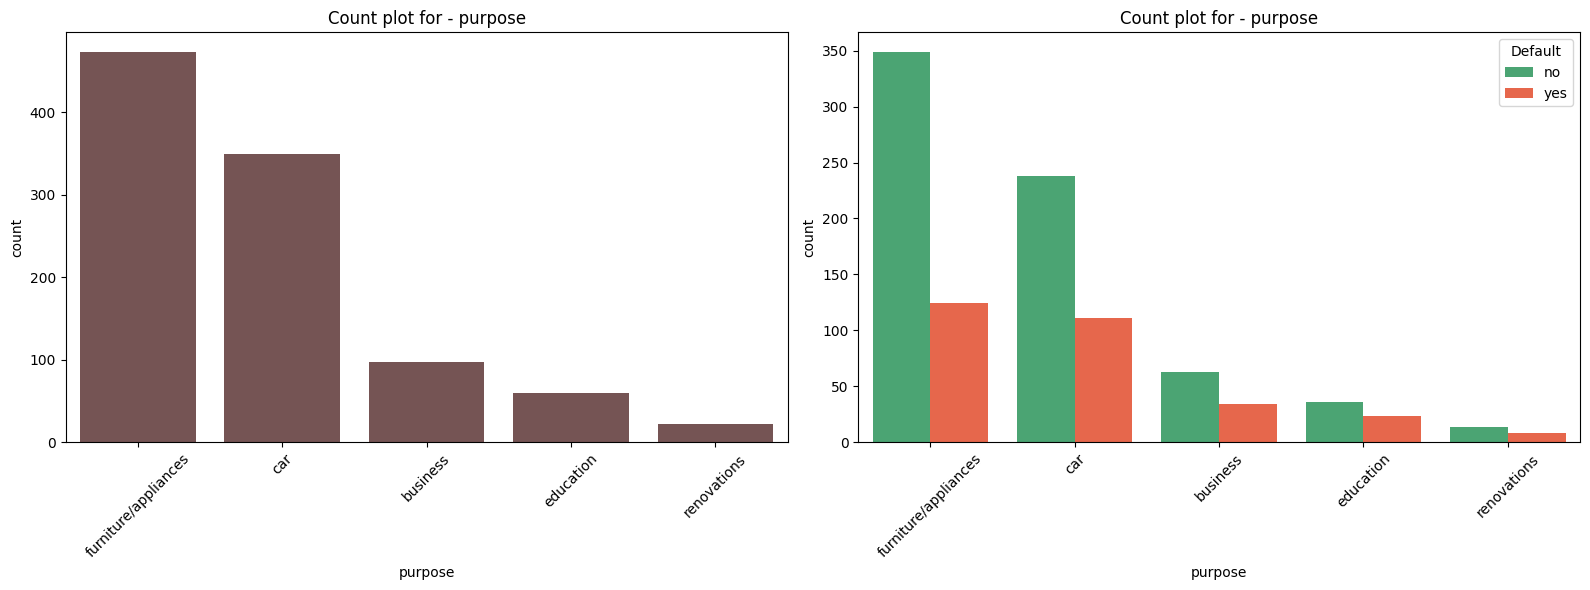

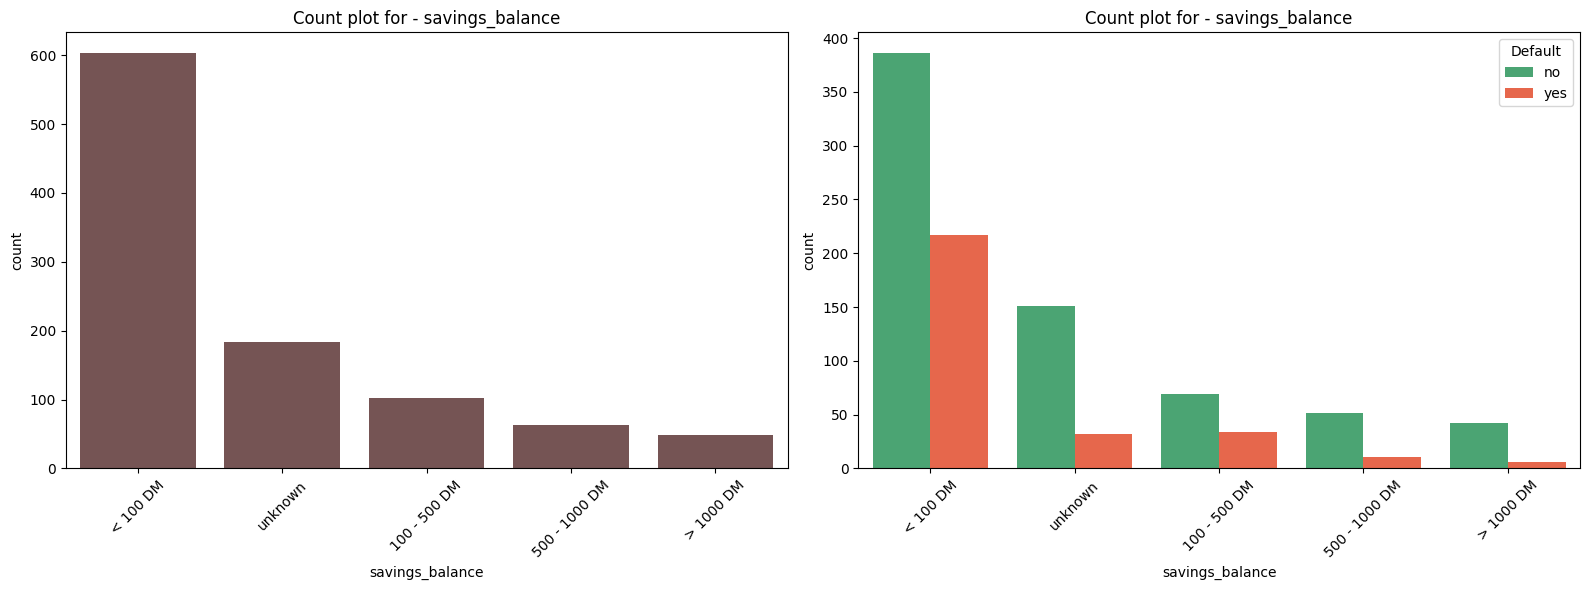

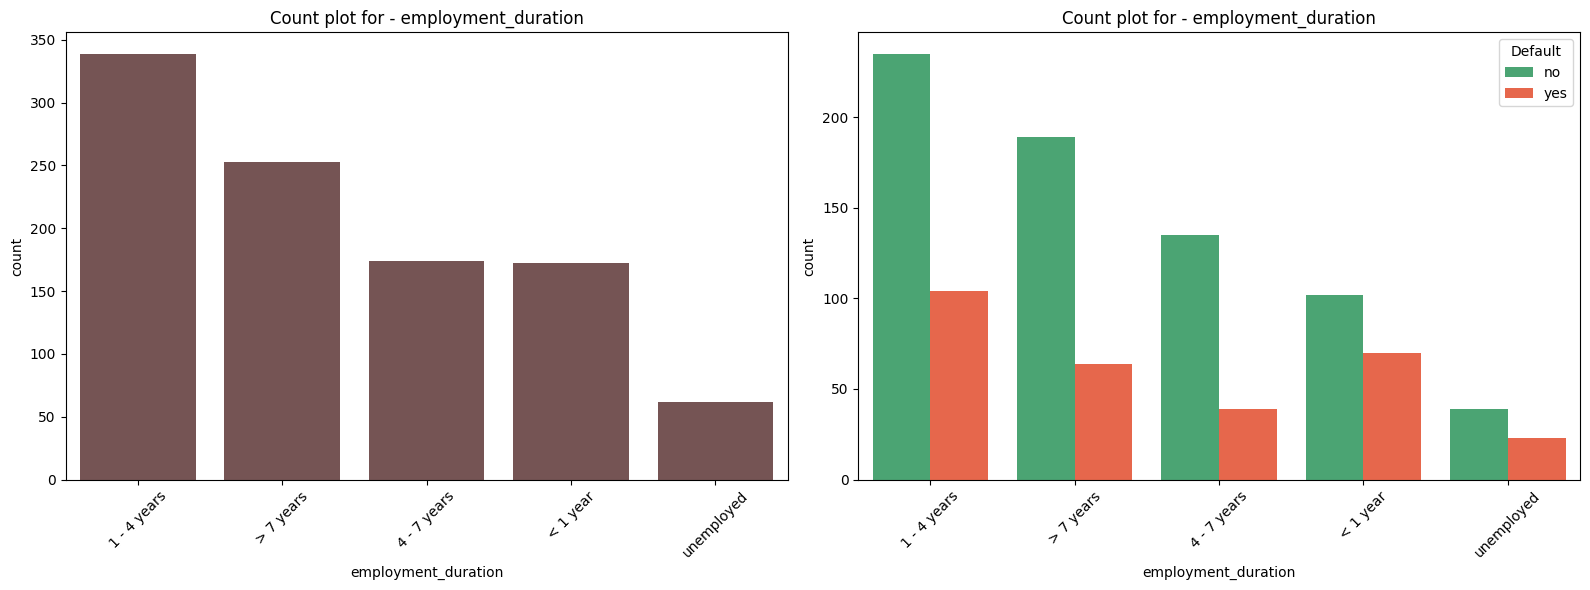

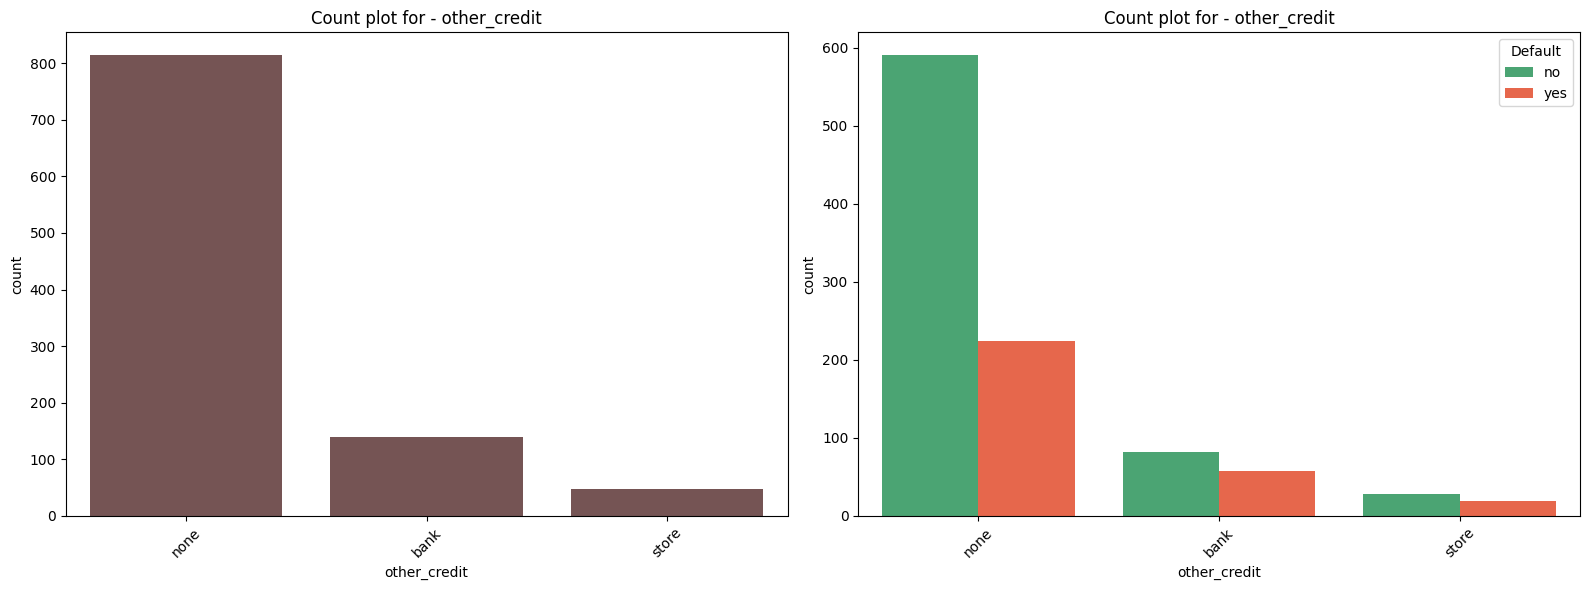

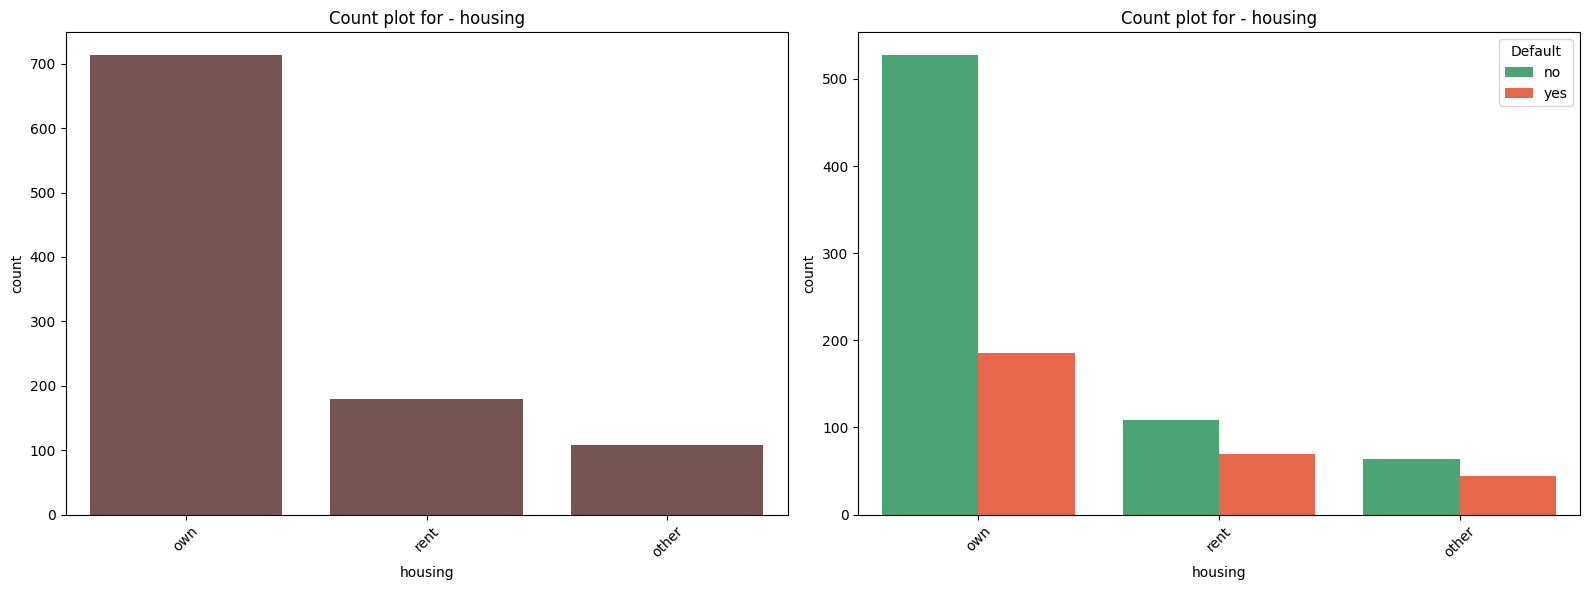

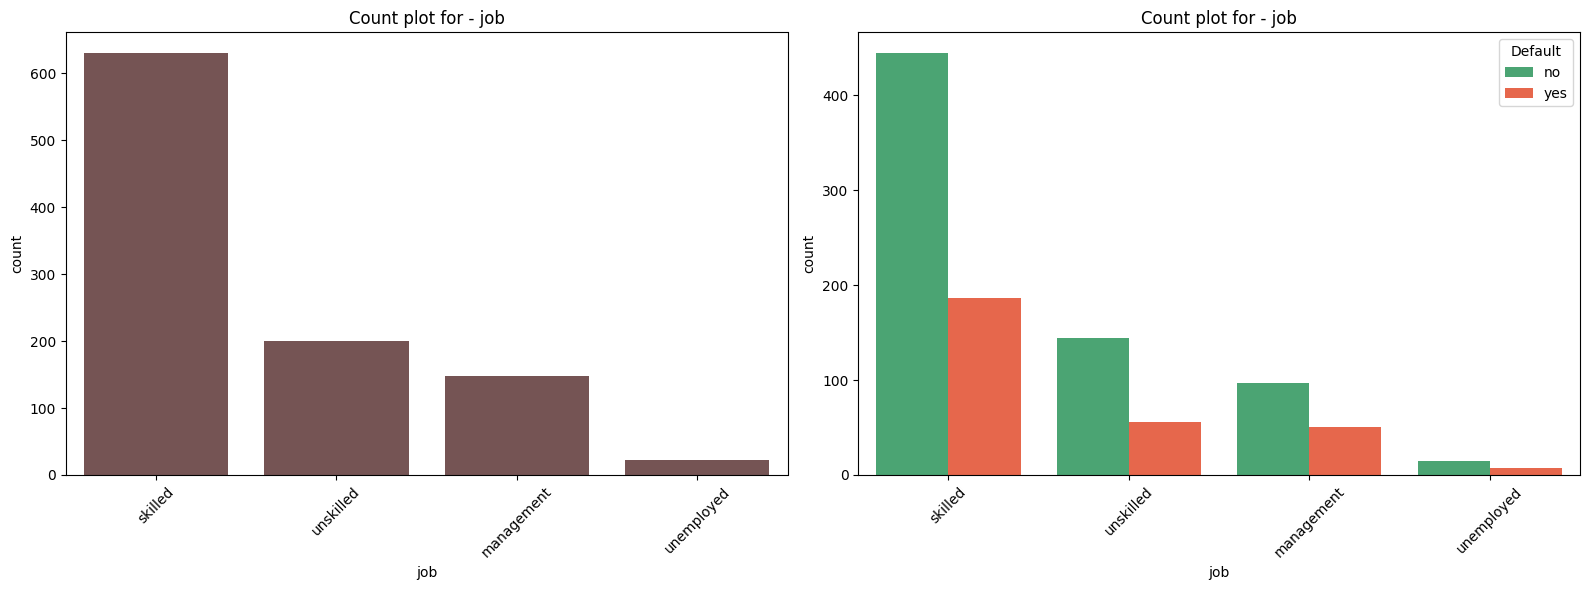

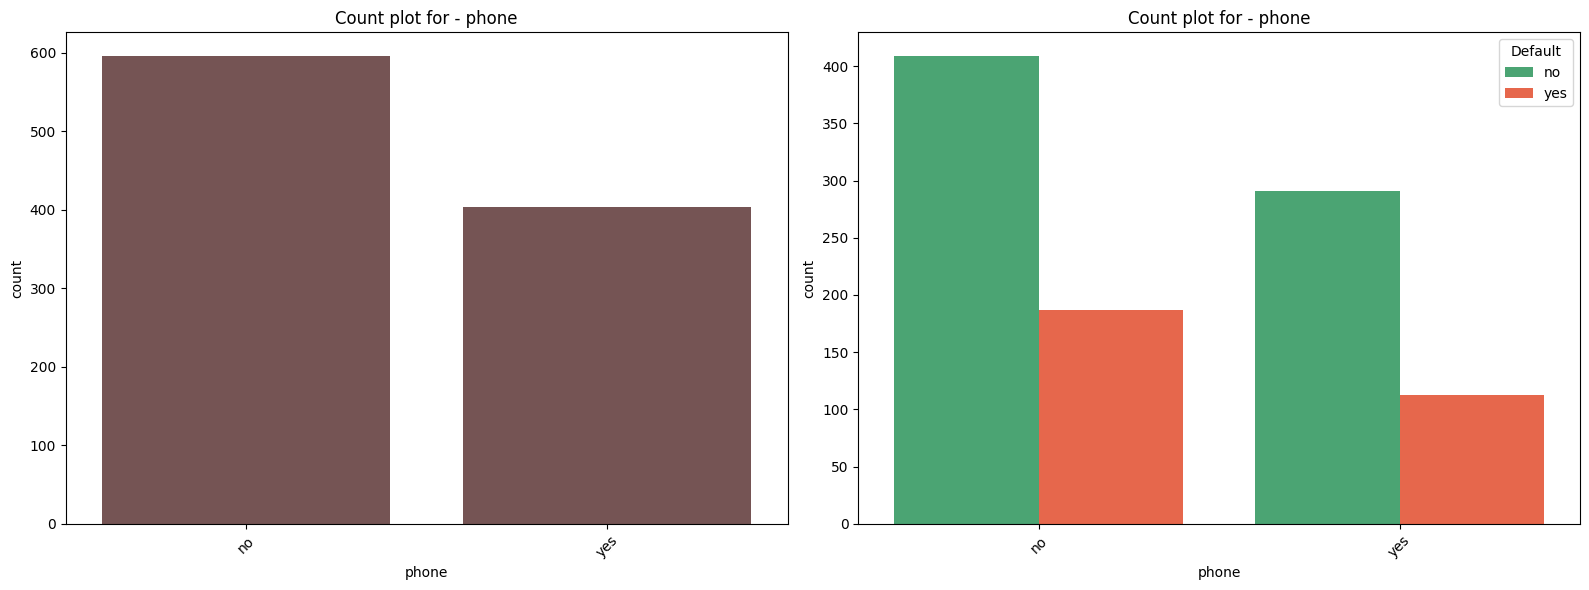

In [300]:
from matplotlib.colors import LinearSegmentedColormap
# Select only categorical columns (exclude 'default' column)
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.drop(columns=['default'])

custom_palette = {'yes': '#FF5733',  # Red
                  'no': '#3CB371'}  # Medium Sea Green

# EDA for each categorical column with and without 'default' as the hue
for categorical_variable in categorical_columns.columns:
    plt.figure(figsize=(16, 6))
    
    # Count plot without hue='default' (sort by descending order)
    plt.subplot(1, 2, 1)  # First subplot
    sns.countplot(data=df, x=categorical_variable,
                  order=df[categorical_variable].value_counts().index)
    plt.title(f'Count plot for - {categorical_variable}')
    plt.xticks(rotation=45)
    
    # Count plot with hue='default' (sort by descending order)
    plt.subplot(1, 2, 2)  # Second subplot

    # Create the countplot with the specified palette
    sns.countplot(data=df, x=categorical_variable, hue='default',
              order=df[categorical_variable].value_counts().index,
              palette=custom_palette)

    plt.title(f'Count plot for - {categorical_variable}')
    plt.xticks(rotation=45)
    plt.legend(title='Default', loc='upper right')
    
    plt.tight_layout()
    plt.show()


### Data Preparation

Predictors variables

* Numerical Variables: ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']
* Categorical Variables
* Nominal columns: ['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
* Ordinal columns: ['credit_history', 'employment_duration']

NOTE: Some of the columns having 'unknown', 'other', 'none' or 'unemployed' as a category and hence cannot be considered as an ordinal variable even though other categories within the column has a hierrachical order.

In [243]:
categorical_columns.head()

,checking_balance,credit_history,purpose,savings_balance,employment_duration,other_credit,housing,job,phone
0,< 0 DM,critical,furniture/appliances,unknown,> 7 years,none,own,skilled,yes
1,1 - 200 DM,good,furniture/appliances,< 100 DM,1 - 4 years,none,own,skilled,no
2,unknown,critical,education,< 100 DM,4 - 7 years,none,own,unskilled,no
3,< 0 DM,good,furniture/appliances,< 100 DM,4 - 7 years,none,other,skilled,no
4,< 0 DM,poor,car,< 100 DM,1 - 4 years,none,other,skilled,no


In [206]:
print(df.columns)
print(df.info())
df.head()

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                  

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [244]:
numerical_columns.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


In [207]:
nominal_data_cols = ['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
nominal_data = df[['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']]

get_category_frequency_data(df, nominal_data_cols)



['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
checking_balance
purpose
savings_balance
other_credit
housing
job
phone


,Column,Category,Frequency
0,checking_balance,unknown,394
1,checking_balance,< 0 DM,274
2,checking_balance,1 - 200 DM,269
3,checking_balance,> 200 DM,63
4,housing,own,713
5,housing,rent,179
6,housing,other,108
7,job,skilled,630
8,job,unskilled,200
9,job,management,148


In [208]:
enc = OneHotEncoder()
encoded_nominal = enc.fit_transform(nominal_data)
encoded_nominal_cols = enc.get_feature_names_out(input_features=nominal_data_cols)

In [209]:
df_nominal_encoded = pd.DataFrame(encoded_nominal.toarray(), columns=encoded_nominal_cols)
df_nominal_encoded.head()

,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [210]:
df_nominal_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   checking_balance_1 - 200 DM    1000 non-null   float64
 1   checking_balance_< 0 DM        1000 non-null   float64
 2   checking_balance_> 200 DM      1000 non-null   float64
 3   checking_balance_unknown       1000 non-null   float64
 4   purpose_business               1000 non-null   float64
 5   purpose_car                    1000 non-null   float64
 6   purpose_education              1000 non-null   float64
 7   purpose_furniture/appliances   1000 non-null   float64
 8   purpose_renovations            1000 non-null   float64
 9   savings_balance_100 - 500 DM   1000 non-null   float64
 10  savings_balance_500 - 1000 DM  1000 non-null   float64
 11  savings_balance_< 100 DM       1000 non-null   float64
 12  savings_balance_> 1000 DM      1000 non-null   fl

In [211]:
ordinal_col_keys = ['credit_history', 'employment_duration']
get_category_frequency_data(df, ordinal_col_keys)


['credit_history', 'employment_duration']
credit_history
employment_duration


,Column,Category,Frequency
0,credit_history,good,530
1,credit_history,critical,293
2,credit_history,poor,88
3,credit_history,very good,49
4,credit_history,perfect,40
5,employment_duration,1 - 4 years,339
6,employment_duration,> 7 years,253
7,employment_duration,4 - 7 years,174
8,employment_duration,< 1 year,172
9,employment_duration,unemployed,62


In [212]:
# Ordinal encoding

from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = {
    'credit_history': ['critical', 'poor', 'good', 'very good', 'perfect'],
    'employment_duration': ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years']
}

df_ordinal = df[ordinal_col_keys]

ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in df_ordinal.columns])

df_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_ordinal), columns=df_ordinal.columns)

encoded_ordinal_suffix = "_encoded"
df_ordinal_encoded.columns = [f"{col}{encoded_ordinal_suffix}" for col in df_ordinal_encoded.columns]

df_ordinal_encoded

,credit_history_encoded,employment_duration_encoded
0,0.0,4.0
1,2.0,2.0
2,0.0,3.0
3,2.0,3.0
4,1.0,2.0
...,...,...
995,2.0,3.0
996,2.0,2.0
997,2.0,4.0
998,2.0,2.0


In [217]:
df_final = pd.concat([df, df_nominal_encoded, df_ordinal_encoded], axis=1)
df_final.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,credit_history_encoded,employment_duration_encoded
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,4.0
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [218]:
print(list(nominal_data_cols))
print(list(ordinal_cols.keys()))
# df_final.drop(columns=list(nominal_cols) + list(ordinal_cols.keys()), inplace=True)

['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
['credit_history', 'employment_duration']


In [219]:
df_final.drop(columns=list(nominal_data_cols) + list(ordinal_cols.keys()), inplace=True)
df_final['default'] = df_final['default'].map({'no': 0, 'yes': 1})
df_final.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,credit_history_encoded,employment_duration_encoded
0,6,1169,4,4,67,2,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
1,48,5951,2,2,22,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0
2,12,2096,2,3,49,1,2,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
3,42,7882,2,4,45,1,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0
4,24,4870,3,4,53,2,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0


In [220]:
pd.set_option('display.max_columns', None)
print(df_final.columns)
print(df_final.info())
df_final

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'default', 'checking_balance_1 - 200 DM', 'checking_balance_< 0 DM',
       'checking_balance_> 200 DM', 'checking_balance_unknown',
       'purpose_business', 'purpose_car', 'purpose_education',
       'purpose_furniture/appliances', 'purpose_renovations',
       'savings_balance_100 - 500 DM', 'savings_balance_500 - 1000 DM',
       'savings_balance_< 100 DM', 'savings_balance_> 1000 DM',
       'savings_balance_unknown', 'other_credit_bank', 'other_credit_none',
       'other_credit_store', 'housing_other', 'housing_own', 'housing_rent',
       'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled',
       'phone_no', 'phone_yes', 'credit_history_encoded',
       'employment_duration_encoded'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Colum

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,credit_history_encoded,employment_duration_encoded
0,6,1169,4,4,67,2,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
1,48,5951,2,2,22,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0
2,12,2096,2,3,49,1,2,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
3,42,7882,2,4,45,1,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0
4,24,4870,3,4,53,2,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0
996,30,3857,4,4,40,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
997,12,804,4,4,38,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,4.0
998,45,1845,4,4,23,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0


### Predictor-Response, Train-Test split and Standard Scaling (Standardization)

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate predictors and target
X = df_final.drop(columns=['default'])
y = df_final['default']

# Note to self: In-retrospect, I could have used StandardScaler() on the predictors 'X' before the Train-Test split.
#https://www.kaggle.com/code/igortrevelin/german-credit-risk/notebook#Modeling

# Train-test split (75-25) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Initialize StandardScaler and fit-transform on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Now, transform the test data
X_test_scaled = scaler.transform(X_test)

## Model 1: Logistic Regression

Logistic Regression - Training Set Performance:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       525
           1       0.65      0.47      0.55       225

    accuracy                           0.77       750
   macro avg       0.72      0.68      0.69       750
weighted avg       0.75      0.77      0.75       750

Logistic Regression - Confusion Matrix (Training Set):
[[468  57]
 [119 106]]



Logistic Regression - Test Set Performance:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       175
           1       0.61      0.48      0.54        75

    accuracy                           0.75       250
   macro avg       0.70      0.67      0.68       250
weighted avg       0.74      0.75      0.74       250



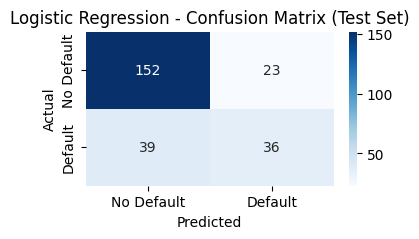

In [222]:
from sklearn.metrics import classification_report, confusion_matrix

lreg_model =  LogisticRegression(random_state=42)

# fit the grid search to the data
lreg_model.fit(X_train_scaled, y_train)

# Predictions on training data
y_pred_train_logreg = lreg_model.predict(X_train_scaled)
# Performance metrics on training data
print("Logistic Regression - Training Set Performance:")
print(classification_report(y_train, y_pred_train_logreg))
conf_matrix_train_logreg = confusion_matrix(y_train, y_pred_train_logreg)
print("Logistic Regression - Confusion Matrix (Training Set):")
print(conf_matrix_train_logreg)

# Predictions on test data
y_pred_test_logreg = lreg_model.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nLogistic Regression - Test Set Performance:")
print(classification_report(y_test, y_pred_test_logreg))
conf_matrix_test_logreg = confusion_matrix(y_test, y_pred_test_logreg)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Logistic Regression - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



### Model 2: Quadratic Discriminant Analysis (QDA)


In [223]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

/Users/yssuman/go/src/github.com/yatender-oktalk/machine-learning-arizona/.env/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

Quadratic Discriminant Analysis - Training Set Performance:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       525
           1       0.59      0.32      0.41       225

    accuracy                           0.73       750
   macro avg       0.67      0.61      0.62       750
weighted avg       0.70      0.73      0.70       750

Quadratic Discriminant Analysis - Confusion Matrix (Training Set):
[[475  50]
 [154  71]]



Quadratic Discriminant Analysis - Test Set Performance:
              precision    recall  f1-score   support

           0       0.71      0.85      0.78       175
           1       0.37      0.20      0.26        75

    accuracy                           0.66       250
   macro avg       0.54      0.53      0.52       250
weighted avg       0.61      0.66      0.62       250



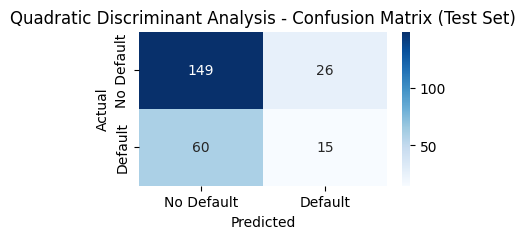

In [224]:
y_pred_train_qda = qda.predict(X_train_scaled)

# Performance metrics on training data
print("Quadratic Discriminant Analysis - Training Set Performance:")
print(classification_report(y_train, y_pred_train_qda))
conf_matrix_train_qda = confusion_matrix(y_train, y_pred_train_qda)
print("Quadratic Discriminant Analysis - Confusion Matrix (Training Set):")
print(conf_matrix_train_qda)

# Make predictions on test data
y_pred_test_qda = qda.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nQuadratic Discriminant Analysis - Test Set Performance:")
print(classification_report(y_test, y_pred_test_qda))
conf_matrix_test_qda = confusion_matrix(y_test, y_pred_test_qda)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_qda, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Quadratic Discriminant Analysis - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 3: k-nearest neighbors algorithm (k-NN)

In [225]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
# KNN algorithm also outputs the class-label predictions directly instead of probabilities of belonging to a class.

# Initialize K-Nearest Neighbors
knn = KNeighborsClassifier()

# Hyperparameters tuning with GridSearchCV to find the best value of 'k' which gives highest 'recall' performance
param_grid = {
    'n_neighbors': [1, 2, 3, 5, 7]
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Print the best value of 'k'
print("Best value of 'k':", best_n_neighbors)

# Initialize K-Nearest Neighbors model with the best hyperparameter 'k' value
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fit the model on the training data
knn_best.fit(X_train_scaled, y_train)

Best value of 'k': 3


KNeighborsClassifier(n_neighbors=3)

K-Nearest Neighbors (with Best 'k') - Training Set Performance:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       525
           1       0.79      0.62      0.69       225

    accuracy                           0.84       750
   macro avg       0.82      0.77      0.79       750
weighted avg       0.83      0.84      0.83       750

K-Nearest Neighbors (with Best 'k') - Confusion Matrix (Training Set):
[[487  38]
 [ 85 140]]



K-Nearest Neighbors (with Best 'k') - Test Set Performance:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       175
           1       0.48      0.40      0.43        75

    accuracy                           0.69       250
   macro avg       0.62      0.61      0.61       250
weighted avg       0.67      0.69      0.68       250



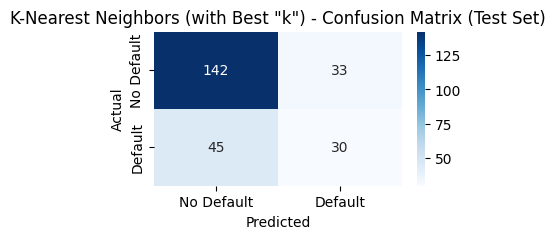

In [226]:
# Make predictions on training data
y_pred_train_knn = knn_best.predict(X_train_scaled)

# Performance metrics on training data
print("K-Nearest Neighbors (with Best 'k') - Training Set Performance:")
print(classification_report(y_train, y_pred_train_knn))
conf_matrix_train_knn = confusion_matrix(y_train, y_pred_train_knn)
print("K-Nearest Neighbors (with Best 'k') - Confusion Matrix (Training Set):")
print(conf_matrix_train_knn)



# Predictions on test data
y_pred_test_knn = knn_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nK-Nearest Neighbors (with Best 'k') - Test Set Performance:")
print(classification_report(y_test, y_pred_test_knn))
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('K-Nearest Neighbors (with Best "k") - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 4: Support Vector Machine (SVM)

In [227]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Support Vector Machines model
svm = SVC(random_state=42)

# Finding the best hyperparameters (cross-validation) by choosing the one which outputs the highest 'recall' performance
param_grid = {
    'C': [5, 10, 15, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Fit the grid search on the training data (GridSearchCV) for hyperparameter tuning (with best 'recall' performance value)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters values from grid search
best_params = grid_search.best_params_
best_C = best_params['C']
best_kernel = best_params['kernel']
best_gamma = best_params['gamma']
print("Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):")
print("C:", best_C)
print("Kernel:", best_kernel)
print("Gamma:", best_gamma)

# Initialize Support Vector Machines model with the best hyperparameters
svm_best = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma, random_state=42)

# Fit the model on the training data
svm_best.fit(X_train_scaled, y_train)

Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):
C: 10
Kernel: rbf
Gamma: scale


SVC(C=10, random_state=42)

Support Vector Machines (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       525
           1       0.99      0.92      0.95       225

    accuracy                           0.97       750
   macro avg       0.98      0.96      0.97       750
weighted avg       0.97      0.97      0.97       750

Support Vector Machine (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[523   2]
 [ 19 206]]



Support Vector Machines (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       175
           1       0.53      0.44      0.48        75

    accuracy                           0.72       250
   macro avg       0.65      0.64      0.64       250
weighted avg       0.70      0.72      0.71       250



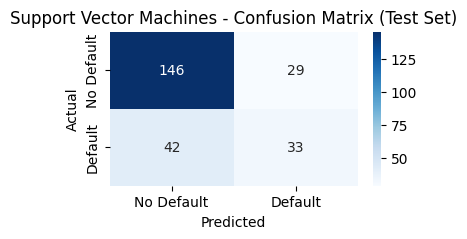

In [228]:
# Make predictions on training data
y_pred_train_svm = svm_best.predict(X_train_scaled)

# Performance metrics on training data
print("Support Vector Machines (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_svm))
conf_matrix_train_svm = confusion_matrix(y_train, y_pred_train_svm)
print("Support Vector Machine (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_svm)

# Make predictions on test data
y_pred_test_svm = svm_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nSupport Vector Machines (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_svm))
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Support Vector Machines - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Model 5: Random Forest

In [229]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV (with 'recall' scoring)
param_grid = {
    'n_estimators': [350, 400, 450],
    'max_depth': [None, 20],
    'min_samples_split': [2, 3, 4]
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("max_depth:", best_max_depth)
print("min_samples_split:", best_min_samples_split)

# Initialize Random Forest model with best hyperparameters
random_forest_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                            min_samples_split=best_min_samples_split,
                                            random_state=42)

# Fit the model on the training data
random_forest_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 350
max_depth: None
min_samples_split: 3


RandomForestClassifier(min_samples_split=3, n_estimators=350, random_state=42)

Random Forest (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Random Forest (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[525   0]
 [  0 225]]



Random Forest (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       175
           1       0.63      0.44      0.52        75

    accuracy                           0.76       250
   macro avg       0.71      0.67      0.68       250
weighted avg       0.74      0.76      0.74       250



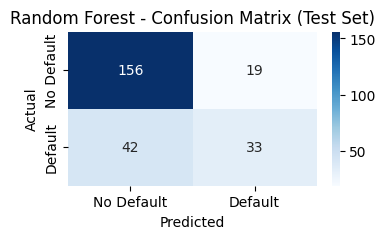

In [230]:
# Predictions on training data
y_pred_train_rf = random_forest_best.predict(X_train_scaled)

# Performance metrics on training data
print("Random Forest (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_rf))
conf_matrix_train_rf = confusion_matrix(y_train, y_pred_train_rf)
print("Random Forest (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_rf)

# Predictions on test data
y_pred_test_rf = random_forest_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nRandom Forest (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_rf))
conf_matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Random Forest - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model 6: XGBoost

In [232]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.3, 0.4, 0.5, 0.6],
    'max_depth': [3, 4, 5, 6]
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)
print("max_depth:", best_max_depth)

# Initialize XGBoost model with best hyperparameters
xgb_best = XGBClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                         max_depth=best_max_depth,
                         random_state=42)

# Fit the model on the training data
xgb_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 200
learning_rate: 0.3
max_depth: 4


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

XGBoost (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

XGBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[525   0]
 [  0 225]]



XGBoost (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       175
           1       0.54      0.49      0.51        75

    accuracy                           0.72       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.71      0.72      0.72       250



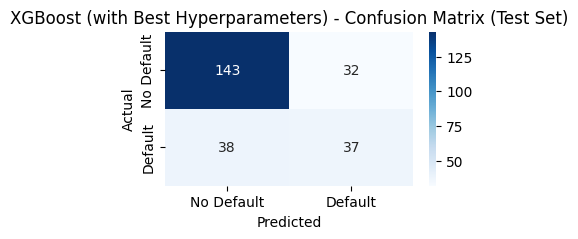

In [233]:
# Predictions on training data
y_pred_train_xgb = xgb_best.predict(X_train_scaled)

# Performance metrics on training data
print("XGBoost (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_xgb))
conf_matrix_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)
print("XGBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_xgb)

# Predictions on test data
y_pred_test_xgb = xgb_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nXGBoost (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_xgb))
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('XGBoost (with Best Hyperparameters) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 7: Ada Boost

In [234]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.5, 0.6, 0.7, 0.8],
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)

# Initialize AdaBoost model with best hyperparameters
adaboost_best = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                                   random_state=42)

# Fit the model on the training data
adaboost_best.fit(X_train_scaled, y_train)

/Users/yssuman/go/src/github.com/yatender-oktalk/machine-learning-arizona/.env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/yssuman/go/src/github.com/yatender-oktalk/machine-learning-arizona/.env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/yssuman/go/src/github.com/yatender-oktalk/machine-learning-arizona/.env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/yssuman/go/src/github.com/yatender-oktalk/machine-learning-a

Best hyperparameters:
n_estimators: 150
learning_rate: 0.7


/Users/yssuman/go/src/github.com/yatender-oktalk/machine-learning-arizona/.env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.7, n_estimators=150, random_state=42)

AdaBoost (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       525
           1       0.75      0.58      0.65       225

    accuracy                           0.82       750
   macro avg       0.79      0.75      0.76       750
weighted avg       0.81      0.82      0.81       750

AdaBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[482  43]
 [ 95 130]]



AdaBoost (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       175
           1       0.57      0.47      0.51        75

    accuracy                           0.74       250
   macro avg       0.68      0.66      0.67       250
weighted avg       0.72      0.74      0.73       250



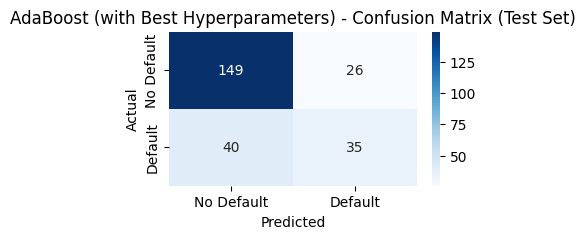

In [235]:
# Predictions on training data
y_pred_train_adaboost = adaboost_best.predict(X_train_scaled)

# Performance metrics on training data
print("AdaBoost (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_adaboost))
conf_matrix_train_adaboost = confusion_matrix(y_train, y_pred_train_adaboost)
print("AdaBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_adaboost)



# Predictions on test data
y_pred_test_adaboost = adaboost_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nAdaBoost (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_adaboost))
conf_matrix_test_adaboost = confusion_matrix(y_test, y_pred_test_adaboost)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_adaboost, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('AdaBoost (with Best Hyperparameters) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 8: Gradient Boosting


In [236]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4],
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)
print("max_depth:", best_max_depth)

# Initialize Gradient Boosting model with best hyperparameters
gradient_boosting_best = GradientBoostingClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                                                    max_depth=best_max_depth,
                                                    random_state=42)
# Fit the model on the training data
gradient_boosting_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 50
learning_rate: 0.3
max_depth: 4


GradientBoostingClassifier(learning_rate=0.3, max_depth=4, n_estimators=50,
                           random_state=42)

Gradient Boosting (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       525
           1       1.00      0.96      0.98       225

    accuracy                           0.99       750
   macro avg       0.99      0.98      0.99       750
weighted avg       0.99      0.99      0.99       750

Gradient Boosting (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[525   0]
 [  9 216]]



Gradient Boosting (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       175
           1       0.60      0.52      0.56        75

    accuracy                           0.75       250
   macro avg       0.70      0.69      0.69       250
weighted avg       0.74      0.75      0.75       250



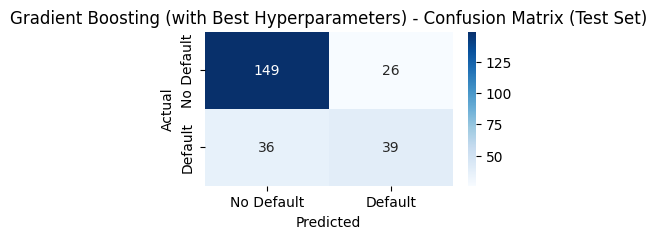

In [237]:
# Predictions on training data
y_pred_train_gb = gradient_boosting_best.predict(X_train_scaled)

# Performance metrics on training data
print("Gradient Boosting (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_gb))
conf_matrix_train_gb = confusion_matrix(y_train, y_pred_train_gb)
print("Gradient Boosting (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_gb)

# Predictions on test data
y_pred_test_gb = gradient_boosting_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nGradient Boosting (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_gb))
conf_matrix_test_gb = confusion_matrix(y_test, y_pred_test_gb)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Gradient Boosting (with Best Hyperparameters) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [238]:
df.describe(include=['O']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,5,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


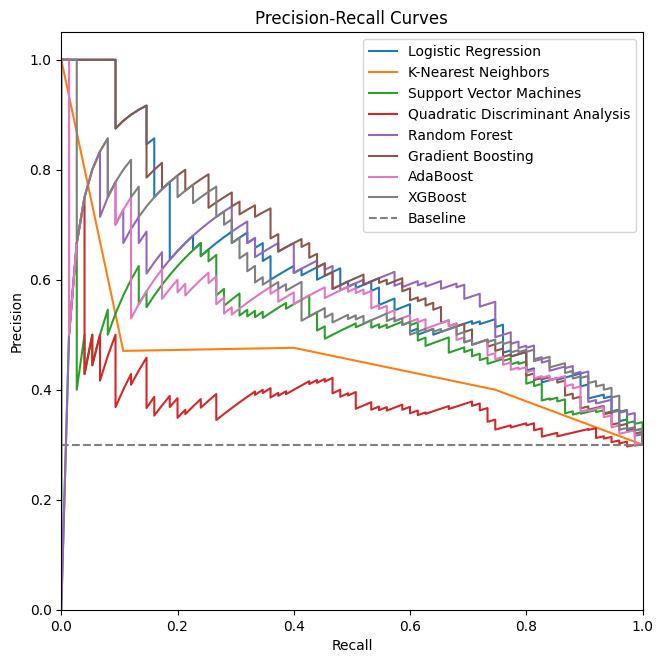

AUC-PR Values (Area Under the Curve in a Precision-Recall plot):
                          Model   AUC-PR
              Gradient Boosting 0.629189
            Logistic Regression 0.609908
                        XGBoost 0.583114
                  Random Forest 0.582257
                       AdaBoost 0.539437
        Support Vector Machines 0.494610
            K-Nearest Neighbors 0.457832
Quadratic Discriminant Analysis 0.385378


In [239]:
from sklearn.metrics import precision_recall_curve, auc

# List of all the model names
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machines',
               'Quadratic Discriminant Analysis', 'Random Forest', 'Gradient Boosting',
               'AdaBoost', 'XGBoost']

# List of corresponding fitted models
fitted_models = [lreg_model, knn_best, svm_best, qda, random_forest_best, gradient_boosting_best,
                 adaboost_best, xgb_best]

# Dictionary to store precision-recall curve data and AUC-PR values
prc_data = {}
auc_pr_values = []

# Calculate precision-recall curve and AUC-PR for each model
for model_name, model in zip(model_names, fitted_models):
    # Calculate predicted probabilities for positive class
    if hasattr(model, "predict_proba"):
        predicted_probabilities = model.predict_proba(X_test_scaled)[:, 1]
    else:
        predicted_probabilities = model.decision_function(X_test_scaled)
        
    # Calculate precision-recall curve (i.e., precision and recall values at different threshold points)
    precision, recall, _ = precision_recall_curve(y_test, predicted_probabilities)
    
    # Calculate AUC-PR (i.e., area under the curve for each model)
    auc_pr = auc(recall, precision)
    auc_pr_values.append(auc_pr)
    
    # Store data in the dictionary
    prc_data[model_name] = {'precision': precision, 'recall': recall}

    

# Plot Precision-Recall curves for all models
plt.figure(figsize=(7.5, 7.5))
for model_name in model_names:
    plt.plot(prc_data[model_name]['recall'], prc_data[model_name]['precision'], label=model_name)

# Calculate the ratio of positive and negative samples in the test set
ratio_positives = len(y_test[y_test == 1]) / len(y_test)
ratio_negatives = 1 - ratio_positives

# Plot baseline curve (always predicting majority class)
plt.plot([0, 1], [ratio_positives, ratio_positives], linestyle='--', label='Baseline', color='gray')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# DataFrame for AUC-PR values
auc_pr_df = pd.DataFrame({'Model': model_names, 'AUC-PR': auc_pr_values})

# Sort DataFrame by AUC-PR in descending order
auc_pr_df = auc_pr_df.sort_values(by='AUC-PR', ascending=False)

# Display AUC-PR values
print("AUC-PR Values (Area Under the Curve in a Precision-Recall plot):")
print(auc_pr_df.to_string(index=False))


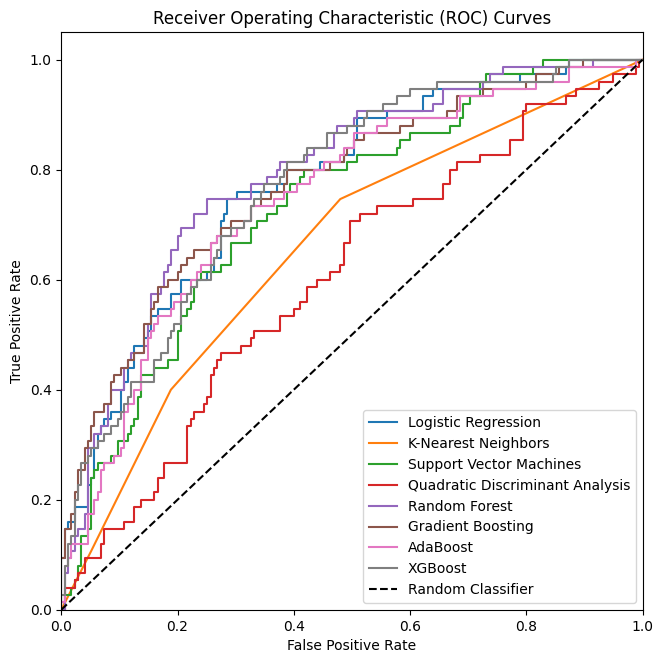

AUC-ROC Values (Area Under the Receiver Operating Characteristic curve):
                          Model  AUC-ROC
                  Random Forest 0.789714
            Logistic Regression 0.772800
              Gradient Boosting 0.771429
                        XGBoost 0.769524
                       AdaBoost 0.746667
        Support Vector Machines 0.733105
            K-Nearest Neighbors 0.658705
Quadratic Discriminant Analysis 0.600838


In [240]:
from sklearn.metrics import roc_curve, roc_auc_score

# Dictionary to store ROC curve data and AUC-ROC values
roc_data = {}
auc_roc_values = []

# Calculate ROC curve and AUC-ROC for each model
for model_name, model in zip(model_names, fitted_models):
    # Calculate predicted probabilities for positive class
    if hasattr(model, "predict_proba"):
        predicted_probabilities = model.predict_proba(X_test_scaled)[:, 1]
    else:
        predicted_probabilities = model.decision_function(X_test_scaled)
        
    # Calculate ROC curve (i.e., false positive rate and true positive rate values)
    fpr, tpr, _ = roc_curve(y_test, predicted_probabilities)
    
    # Calculate AUC-ROC (i.e., area under the curve for each model)
    auc_roc = roc_auc_score(y_test, predicted_probabilities)
    auc_roc_values.append(auc_roc)
    
    # Store data in the dictionary
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr}

    

# Plot ROC curves for all models
plt.figure(figsize=(7.5, 7.5))
for model_name in model_names:
    plt.plot(roc_data[model_name]['fpr'], roc_data[model_name]['tpr'], label=model_name)

# Plot the random classifier line (dashed)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# DataFrame for AUC-ROC values
auc_roc_df = pd.DataFrame({'Model': model_names, 'AUC-ROC': auc_roc_values})

# Sort DataFrame by AUC-ROC in descending order
auc_roc_df = auc_roc_df.sort_values(by='AUC-ROC', ascending=False)

# Display AUC-ROC values
print("AUC-ROC Values (Area Under the Receiver Operating Characteristic curve):")
print(auc_roc_df.to_string(index=False))